## Validating the features of CPU and GPU associated with the system.

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15569116364115650457
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14444920832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16693863416603580198
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Checking the currently utilized GPU system and its attributes.

In [2]:
!nvidia-smi

Mon Aug 22 14:05:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |    284MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Since, we will be training some textual data, and we need to save our data model for testing purposes. We cannot completely rely on Colab for data storage. So, it is important to connect our session to Google Drive as an external storage.

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Importing releventy modules like Pandas and numpy.

In [5]:
import pandas as pd
import numpy as np

### Importing matplotlib.pyplot --> act as a GUI manager, intended for interactive plots,figures and axes in figures.

In [6]:
import matplotlib.pyplot as plt

### Importing seaborn -- Asserts a high-level interface for drawing attractive and informative stastical graphics.

In [7]:
import seaborn as sns

### Loading the Datasets.

In [11]:
news_dataset = pd.read_csv("gdrive/MyDrive/Fake_News_Detection/train.csv")

### Checking traits of imported data set where 20800 is the rows and 5 is the column.

In [12]:
print("Shape of the News Data: ", news_dataset.shape)
print("News data relevant Columns", news_dataset.columns)

Shape of the News Data:  (20800, 5)
News data relevant Columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [13]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
news_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


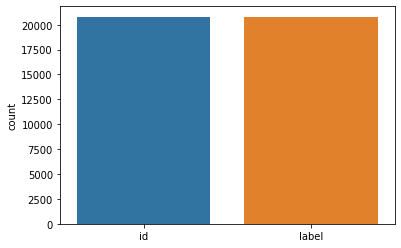

In [15]:
sns.countplot(data = news_dataset)

### Understanding the stastistics of the text column | From total of 20800 data 20761 has actual data and rest of them are null.

In [16]:
text_length = news_dataset.text.str.split().str.len()
text_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

#### Understanding the stastistics of the title column | From total of 20800 data 20242 has actual data and rest of them are null.

In [17]:
title_length = news_dataset.title.str.split().str.len()
title_length.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

#### Plotting and counting the label

1: Unreliable
0; Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


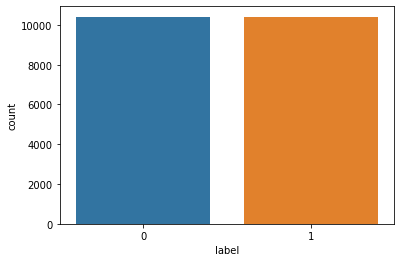

In [18]:
sns.countplot(x="label", data = news_dataset)
print("1: Unreliable")
print("0; Reliable")
print("Distribution of labels:")
print(news_dataset.label.value_counts())

In [19]:
print(round(news_dataset.label.value_counts(normalize=True),2)*100)

1    50.0
0    50.0
Name: label, dtype: float64


### Data Cleaning For Analysis 

#### Constants relevant in data sanitization.

In [20]:
column_name = {'id', 'title', 'author', 'text', 'label'}
column_to_remove = {'id', 'author'}
categorical_features = []
target_column = ['label']
text_f = ['title','text']

Cleansing the Database.

#### Importing NLTK -- act as a Natural Language Toolkit, work as a platform for building python program to work with human language data. re -- is imported for regex(regular expression).

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

In [24]:
stop_words = stopwords.words('english')
stopwords_dictionary = Counter(stop_words)

In [25]:
print(stopwords_dictionary)

Counter({'i': 1, 'me': 1, 'my': 1, 'myself': 1, 'we': 1, 'our': 1, 'ours': 1, 'ourselves': 1, 'you': 1, "you're": 1, "you've": 1, "you'll": 1, "you'd": 1, 'your': 1, 'yours': 1, 'yourself': 1, 'yourselves': 1, 'he': 1, 'him': 1, 'his': 1, 'himself': 1, 'she': 1, "she's": 1, 'her': 1, 'hers': 1, 'herself': 1, 'it': 1, "it's": 1, 'its': 1, 'itself': 1, 'they': 1, 'them': 1, 'their': 1, 'theirs': 1, 'themselves': 1, 'what': 1, 'which': 1, 'who': 1, 'whom': 1, 'this': 1, 'that': 1, "that'll": 1, 'these': 1, 'those': 1, 'am': 1, 'is': 1, 'are': 1, 'was': 1, 'were': 1, 'be': 1, 'been': 1, 'being': 1, 'have': 1, 'has': 1, 'had': 1, 'having': 1, 'do': 1, 'does': 1, 'did': 1, 'doing': 1, 'a': 1, 'an': 1, 'the': 1, 'and': 1, 'but': 1, 'if': 1, 'or': 1, 'because': 1, 'as': 1, 'until': 1, 'while': 1, 'of': 1, 'at': 1, 'by': 1, 'for': 1, 'with': 1, 'about': 1, 'against': 1, 'between': 1, 'into': 1, 'through': 1, 'during': 1, 'before': 1, 'after': 1, 'above': 1, 'below': 1, 'to': 1, 'from': 1, 'up':

##### Defining function to remove the unused columns

In [26]:
def remove_unused_column(df, column_name=column_to_remove):
    df = df.drop(column_name, axis=1)
    return df

##### Impute (Representating) the null value with None.

In [27]:
def null_process(feature_df):
    for coln in text_f:
        feature_df.loc[feature_df[coln].isnull(), coln] = "None"
    return feature_df

CLeansing the Database through function creation

In [28]:
def cleansing_dataset(df):
    #removal of the unused column
    df = remove_unused_column(df)
    #imputing the null values
    df = null_process(df)
    return df

#### Cleaning the text from unused characters

In [29]:
def clean_text(text):
    #removing the URLS
    text = str(text).replace(r'http[\w:/\.]+','') 
    #Removing everything but characters and punctuations
    text = str(text).replace(r'[^\.\w\s]','')
    text = str(text).replace(r'[^a-zA-Z]','')
    text = str(text).replace(r'\s\s+','')
    text = text.lower().strip()
    return text

#### NLTK Preprocessing 

In [30]:
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]','',text).split()
    #text = ''.join([word for word in wordlist if word not in stopwords_dictionary])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dictionary])
    return text
    

#### Preprocessing the text and the title.

In [31]:
nltk.download('omw-1.4')
# Performing data cleaning on train and test dataset by calling clean_dataset function.
df = cleansing_dataset(news_dataset)
# Aplying preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)
# Aplying processing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### Dataset after cleaning and preprocessing step

In [32]:
df.head()
roc_dataframe = news_dataset.tail()

In [33]:
roc_dataframe.head()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


_____________________________________

## Explorative Data Analysis

#### Univariate Analysis:

#### Bivariate Analysis:

In [34]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

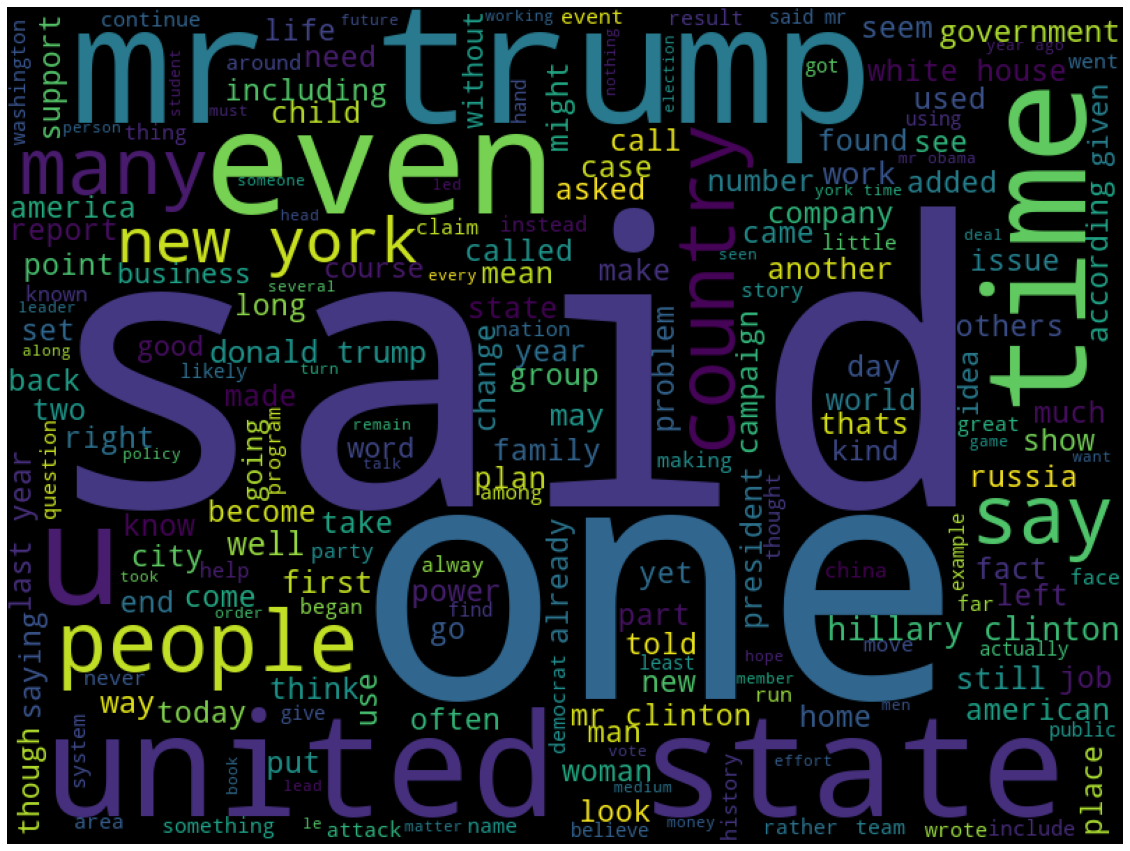

In [36]:
# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

#### Creating Word Cloud for relaible news only

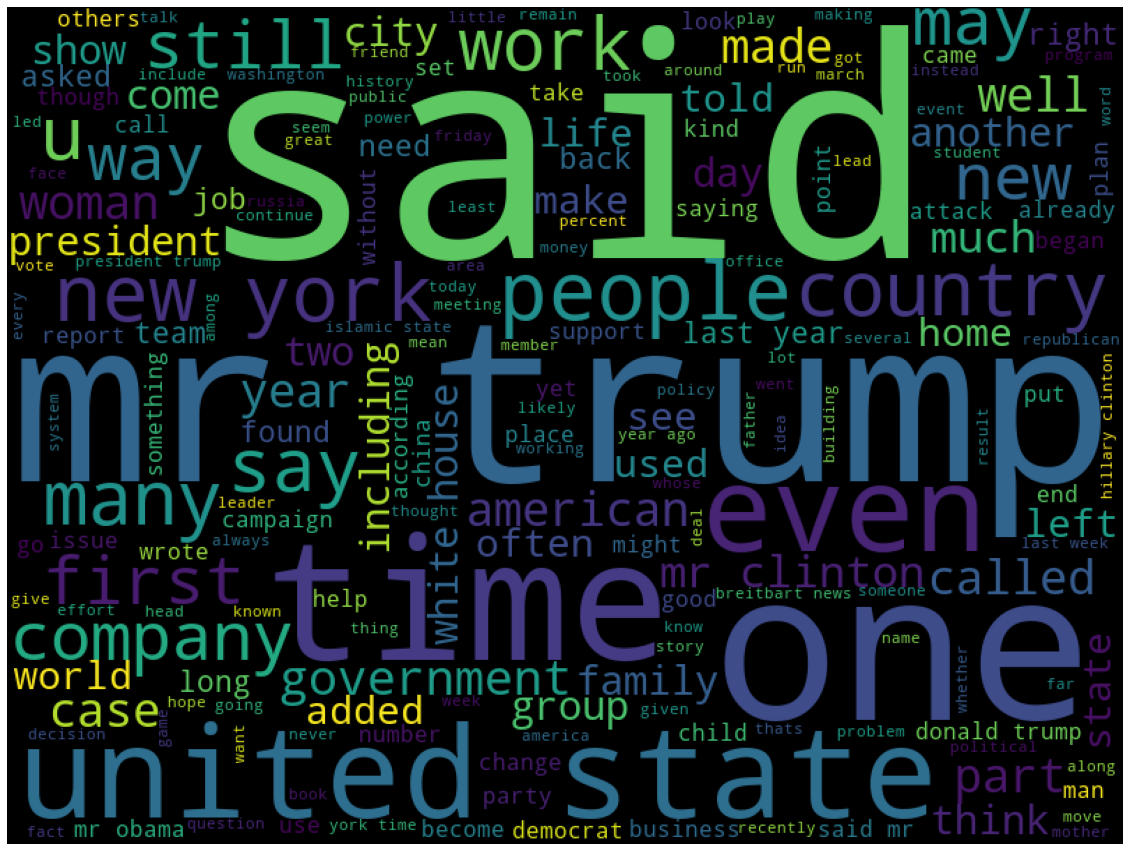

In [37]:
true_n = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

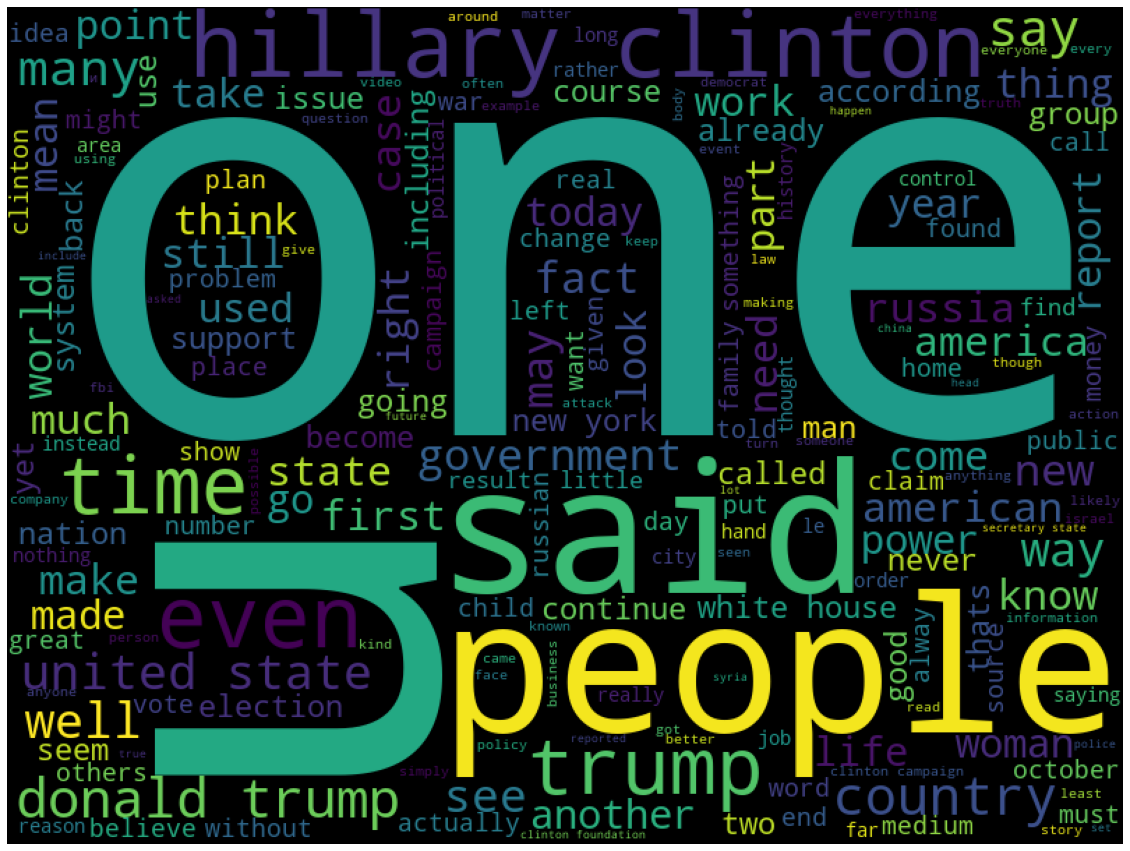

In [38]:
fake_n = ' '.join(df[df['label']==1]['text'])
wc = wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Most Frequent Bigram (Two-word Combination) 

In [39]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

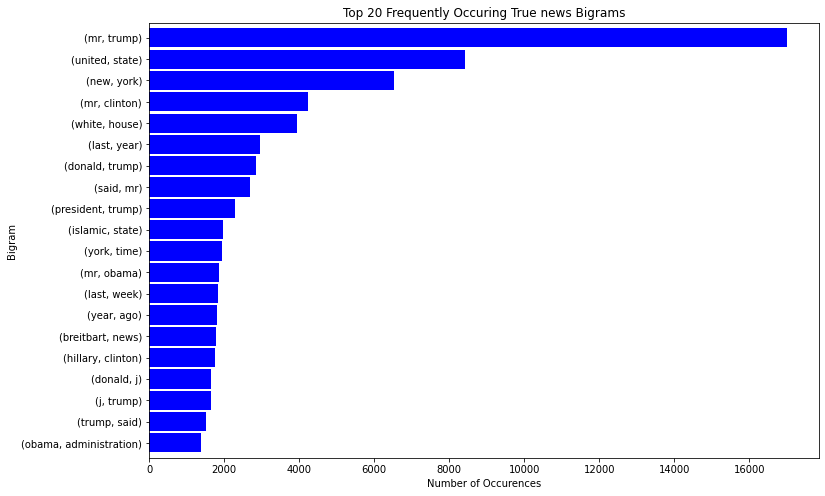

In [40]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

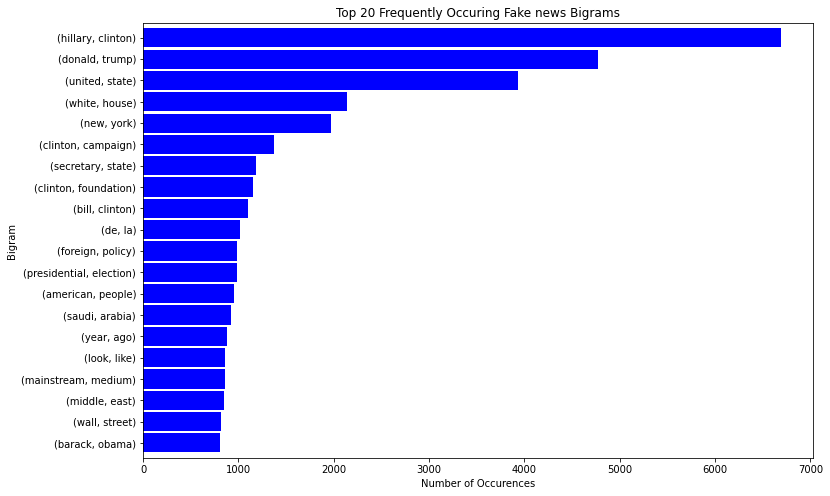

In [41]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

### Most Frequent Trigram (Three-word combination)


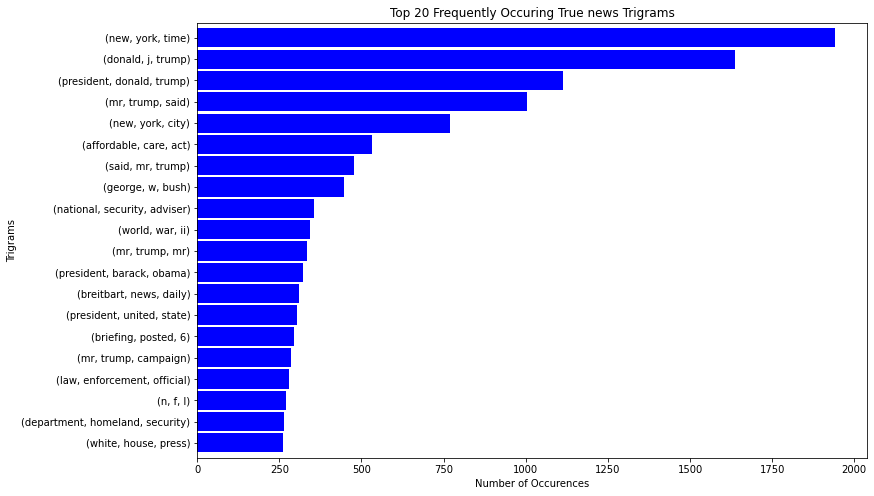

In [42]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

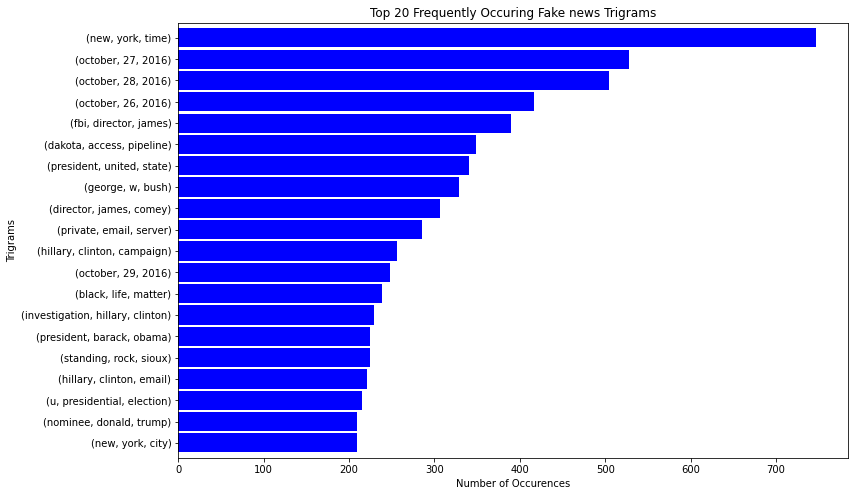

In [43]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

### Building a Classifier by Fine-tuning BERT

In [44]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 30.2 MB/s 
     |████████████████████████████████| 6.6 MB 61.6 MB/s 
     |████████████████████████████████| 101 kB 11.3 MB/s 


In [45]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [47]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [48]:
# the model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512

#### Loading the tokenizer

In [49]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

### Data Preparation

##### Cleaning NaN values from text, author, and title columns:

In [50]:
news_df = news_dataset[news_dataset['text'].notna()]
news_df = news_df[news_df["author"].notna()]
news_df = news_df[news_df["title"].notna()]

##### Making a function that takes the dataset as a Pandas dataframe and returns the train/validation splits of texts and labels as lists:

In [51]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
  texts = []
  labels = []
  for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    if include_title:
      text = df["title"].iloc[i] + " - " + text
    if include_author:
      text = df["author"].iloc[i] + " : " + text
    if text and label in [0, 1]:
      texts.append(text)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

##### Ensuring the labels and texts have same length

In [52]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

14628 14628
3657 3657


## Tokenizing the Dataset

#### Using the BERT tokenizer to tokenize our dataset

In [53]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

#### Converting the encodings into a PyTorch dataset:

In [54]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [55]:
print(len(train_encodings))
print(len(valid_encodings))
print(len(train_labels))
print(len(valid_labels))

3
3
14628
3657


## Loading and Fine-tuning the Model


#### Using BertForSequenceClassification to load our BERT transformer model

In [56]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [57]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  global predections
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  predections = preds
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }


###### We set num_labels to 2 since it's a binary classification

### Initalizing the training parameters

##### Setting the logging_steps & save_steps to 200 : we're going to perform evaluation & save the model weights on each 200 training step.

In [58]:
training_args = TrainingArguments(
    output_dir='gdrive/MyDrive/Fake_News_Detection/results',          # output directory
    num_train_epochs=1,                                               # total number of training epochs
    per_device_train_batch_size=10,                                   # batch size per device during training
    per_device_eval_batch_size=20,                                    # batch size for evaluation
    warmup_steps=100,                                                 # number of warmup steps for learning rate scheduler
    logging_dir='gdrive/MyDrive/Fake_News_Detection/results/logs',    # directory for storing logs     
    load_best_model_at_end=True,                                      # load the best model when finished training (default metric is loss)
                                                                      # but we can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,                                                # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",                                      # evaluate each `logging_steps`
)

#### Instantiating the trainer:

In [59]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [60]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 14628
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1463


Step,Training Loss,Validation Loss,Accuracy
200,0.250800,0.102696,0.982499
400,0.024900,0.019234,0.996992
600,0.026600,0.076930,0.987968
800,0.009100,0.009887,0.998633
1000,0.011600,0.011867,0.998359
1200,0.006500,0.006283,0.999180
1400,0.013200,0.005867,0.999180


***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to gdrive/MyDrive/Fake_News_Detection/results/checkpoint-200
Configuration saved in gdrive/MyDrive/Fake_News_Detection/results/checkpoint-200/config.json
Model weights saved in gdrive/MyDrive/Fake_News_Detection/results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to gdrive/MyDrive/Fake_News_Detection/results/checkpoint-400
Configuration saved in gdrive/MyDrive/Fake_News_Detection/results/checkpoint-400/config.json
Model weights saved in gdrive/MyDrive/Fake_News_Detection/results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to gdrive/MyDrive/Fake_News_Detection/results/checkpoint-600
Configuration saved in gdrive/MyDrive/Fake_News_Detection/results/checkpoint-600/config.json
Model weights saved in gdrive/MyDrive/Fake_News_Detecti

TrainOutput(global_step=1463, training_loss=0.04723757456527209, metrics={'train_runtime': 2585.6016, 'train_samples_per_second': 5.657, 'train_steps_per_second': 0.566, 'total_flos': 3848788517806080.0, 'train_loss': 0.04723757456527209, 'epoch': 1.0})

In [61]:
# evaluate the current model after training
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20


{'eval_loss': 0.005866680294275284,
 'eval_accuracy': 0.9991796554552912,
 'eval_runtime': 126.2966,
 'eval_samples_per_second': 28.956,
 'eval_steps_per_second': 1.449,
 'epoch': 1.0}

In [62]:
import json
import pandas as pd

file_name = "/content/gdrive/MyDrive/Fake_News_Detection/results/checkpoint-1400/trainer_state.json"

loss_curve_df = pd.read_json(file_name)
log_data = list(loss_curve_df['log_history'])
training_loss = []
validation_loss = []
epochs_count = []
check_points = []
acc_accuracy = []

for i in (log_data):
  fetch_value=i.values()
  list_fetch_value = list(fetch_value)
  check_points.append(list_fetch_value)

for j in check_points:
  if len(j) == 4:
    training_loss.append(j[2])
    epochs_count.append(j[0])
  elif len(j) == 7:
    validation_loss.append(j[2])
    epochs_count.append(j[0])
    acc_accuracy.append(j[1])

training_dict = {'t_loss':training_loss}
validation_dict = {'v_loss':validation_loss}
accuracy_dict = {'Accuracy': acc_accuracy}

print(accuracy_dict)

{'Accuracy': [0.9824993163795461, 0.996992070002734, 0.9879682800109381, 0.9986327590921521, 0.998359310910582, 0.9991796554552911, 0.9991796554552911]}


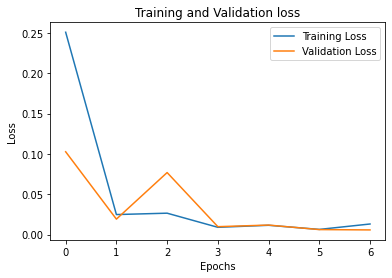

In [63]:
import matplotlib.pyplot as plt

plt.plot(training_dict['t_loss'],label='Training Loss')
plt.plot(validation_dict['v_loss'],label='Validation Loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

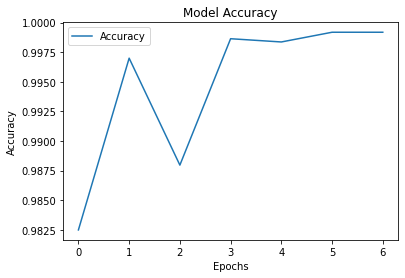

In [64]:
import matplotlib.pyplot as plt

plt.plot(accuracy_dict['Accuracy'],label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# saving the model for further use
trainer.save_model('gdrive/MyDrive/Fake_News_Detection/results/Fake-news-detector')

Saving model checkpoint to gdrive/MyDrive/Fake_News_Detection/results/Fake-news-detector
Configuration saved in gdrive/MyDrive/Fake_News_Detection/results/Fake-news-detector/config.json
Model weights saved in gdrive/MyDrive/Fake_News_Detection/results/Fake-news-detector/pytorch_model.bin


In [66]:
# saving the fine tuned model & tokenizer
model_path = "gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/config.json
Model weights saved in gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/special_tokens_map.json


('gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/tokenizer_config.json',
 'gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/special_tokens_map.json',
 'gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/vocab.txt',
 'gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/added_tokens.json',
 'gdrive/MyDrive/Fake_News_Detection/fake-news-bert-base-uncased/tokenizer.json')

In [67]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    print(probs)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [68]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [69]:
get_prediction(real_news, convert_to_label=True)

tensor([[9.9994e-01, 6.4358e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


'reliable'

In [70]:
# reading the test set
test_df = pd.read_csv("gdrive/MyDrive/Fake_News_Detection/test.csv")

In [71]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [72]:
# make a copy of the testing set
new_df = test_df.copy()

In [73]:
# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["author"].astype(str) + " : " + new_df["title"].astype(str) + " - " + new_df["text"].astype(str)
new_df.head()

,id,title,author,text,new_text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld : Specter of Trump Loosens To...
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,nan : Russian warships ready to strike terrori...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams : #NoDAPL: Native American Leade...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor : Tim Tebow Will Attempt Another...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network : Keiser Report: Meme ...


In [74]:
# getting the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)

Streaming output truncated to the last 5000 lines.
tensor([[9.9995e-01, 4.9347e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[3.2081e-04, 9.9968e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.5995e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[2.3066e-04, 9.9977e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[3.3976e-04, 9.9966e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[1.6325e-04, 9.9984e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[5.5585e-04, 9.9944e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[1.2060e-04, 9.9988e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.8285e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.8039e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.5367e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[2.1456e-04, 9.9979e-01]], device='cuda:0', grad_fn=<SoftmaxB

In [75]:
new_df.head()

,id,title,author,text,new_text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld : Specter of Trump Loosens To...,0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,nan : Russian warships ready to strike terrori...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams : #NoDAPL: Native American Leade...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor : Tim Tebow Will Attempt Another...,0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network : Keiser Report: Meme ...,1


In [76]:
# making a copy of the testing set
new_roc_dataframe = roc_dataframe

#Meanwhile a new column gets appended merging the title and the text
new_roc_dataframe['text_to_process'] = new_roc_dataframe["author"].astype(str) + ":" + new_roc_dataframe["title"].astype(str) + "-" + new_roc_dataframe["text"].astype(str)
new_roc_dataframe.head()

#Initating a batch predection
new_roc_dataframe["roc_predicted_label"] = new_roc_dataframe['text_to_process'].apply(get_prediction)

tensor([[9.9995e-01, 4.9696e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.7032e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[9.9995e-01, 4.5773e-05]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[1.2481e-04, 9.9988e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([[8.3240e-04, 9.9917e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [77]:
new_roc_dataframe.head()

,id,title,author,text,label,text_to_process,roc_predicted_label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson:Rapper T.I.: Trump a ’Poster Chi...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman:N.F.L. Playoffs: Schedule, Ma...",0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams:Macy...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary:NATO, Russia To Hold Parallel Exer...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,David Swanson:What Keeps the F-35 Alive- Davi...,1


In [78]:
thresholds = list(np.array(list(range(0, 105, 5)))/100)

In [79]:
roc_point = []

for threshold in thresholds:
  
  tp = 0; fp = 0; fn = 0; tn = 0

  for index, instance in new_roc_dataframe.iterrows():
    actual = instance["label"]
    elab_predection = instance["roc_predicted_label"]

    #print(actual, elab_predection)

    if elab_predection >=threshold:
      prediction_class = 1
    else:
      prediction_class = 0

    if prediction_class == 1 and actual ==1:
      tp = tp + 1
    elif actual == 1 and prediction_class == 0:
      fn = fn + 1
    elif actual == 0 and prediction_class == 1:
      fp = fp + 1
    elif actual == 0 and prediction_class == 0:
      tn = tn + 1

  #print(tp, fp, fn, tn)

  tpr = tp / (tp + fn)
  fpr = fp / (tn + fp)

  #print(tpr, fpr)
  roc_point.append([tpr, fpr])

In [80]:
pivot= pd.DataFrame(roc_point, columns =['x','y'])
pivot['threshold']=thresholds

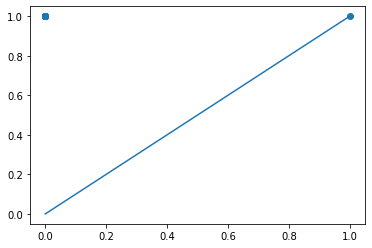

In [81]:
plt.scatter(pivot.y,pivot.x)
plt.plot([0,1])
#plt.xlabel['False Positive Rate']
#plt.ylabel['True Positive Rate']

In [82]:
auc = round(abs(np.trapz(pivot.x,pivot.y)),4)
print(auc)

1.0


In [83]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [84]:
from sklearn.metrics import confusion_matrix
#print(type(predections))
predection_list= list(predections)
#roc_df = pd.DataFrame(predection_list, columns = ['Predections'])

rounded_predictions = predections
cm = confusion_matrix(y_true=valid_labels, y_pred=rounded_predictions)

cm_ls =[]
for i in cm:
    for j in i:
        cm_ls.append(j)


True_positive= cm_ls[0]
False_Positive = cm_ls[1]
False_Negative = cm_ls[2]
True_negative = cm_ls[3]


Recall = (True_positive/ (True_positive + False_Negative))
Precision = (True_positive/ (True_positive + False_Positive))
F1_score = 2*((Precision * Recall)/(Precision + Recall))

print(Recall, Precision, F1_score)

0.9995180722891567 0.9990366088631984 0.9992772825825103


In [85]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Predicted Value')
    plt.xlabel('Actual Value')

In [86]:
cm_plot_labels = ['Positive','Negative']

Confusion matrix, without normalization
[[2074    2]
 [   1 1580]]


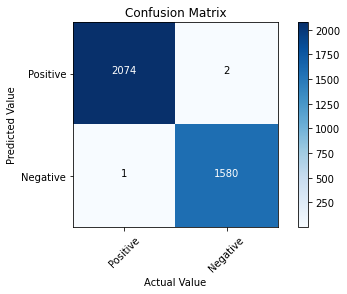

In [87]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
# the relaible source of news predicted correctly is 2074 and 2 is in accurate while the unrelaiable source of news predicted corretly is 1580 and inaccurate fake news is 1.
#True positive= 2074
#False Positive = 2
#True negative = 1
#False Negative = 1580

In [88]:
# making the overall submission file
final_df = new_df[["id", "label"]]
final_df.to_csv("gdrive/MyDrive/Fake_News_Detection/submit_final.csv", index=False)